/tmp/ipykernel_112587/3537536157.py:9: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  pdf_personalizada /= np.trapz(pdf_personalizada, x) # Normalizar para que a área seja 1


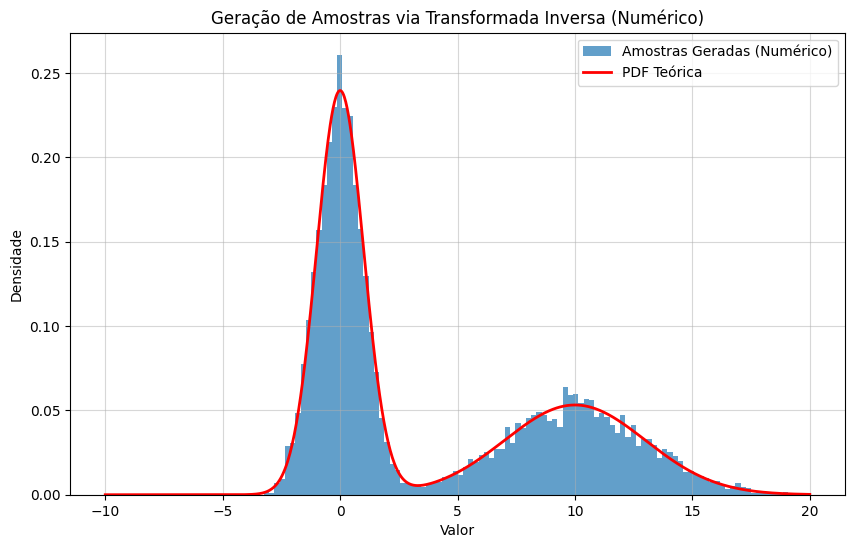

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# 1. DEFINIR A PDF DA NOSSA DISTRIBUIÇÃO PERSONALIZADA
# Uma mistura de duas gaussianas: uma alta e estreita, outra baixa e larga
x = np.linspace(-10, 20, 1000)
pdf_personalizada = 0.6 * norm.pdf(x, loc=0, scale=1) + 0.4 * norm.pdf(x, loc=10, scale=3)
pdf_personalizada /= np.trapz(pdf_personalizada, x) # Normalizar para que a área seja 1

# 2. CALCULAR A CDF NUMERICAMENTE
# Usamos a soma cumulativa (cumsum) e normalizamos
cdf_personalizada = np.cumsum(pdf_personalizada)
cdf_personalizada = (cdf_personalizada - cdf_personalizada.min()) / (cdf_personalizada.max() - cdf_personalizada.min())


# 3. GERAR NÚMEROS ALEATÓRIOS E APLICAR A INVERSA NUMÉRICA
num_amostras = 10000
u = np.random.rand(num_amostras)

# 4. Usar interpolação para encontrar o valor x correspondente a cada u.
# np.interp age como a nossa F^-1(u) numérica.
amostras_geradas = np.interp(u, cdf_personalizada, x)

# 5. Plotar para verificar
plt.figure(figsize=(10, 6))
plt.hist(amostras_geradas, bins=100, density=True, label='Amostras Geradas (Numérico)', alpha=0.7)
plt.plot(x, pdf_personalizada, 'r-', linewidth=2, label='PDF Teórica')
plt.title('Geração de Amostras via Transformada Inversa (Numérico)')
plt.xlabel('Valor')
plt.ylabel('Densidade')
plt.legend()
plt.grid(True, alpha=0.5)
plt.show()

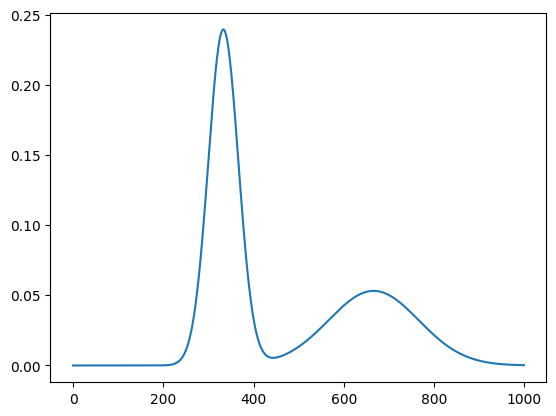

In [4]:
plt.plot(pdf_personalizada)

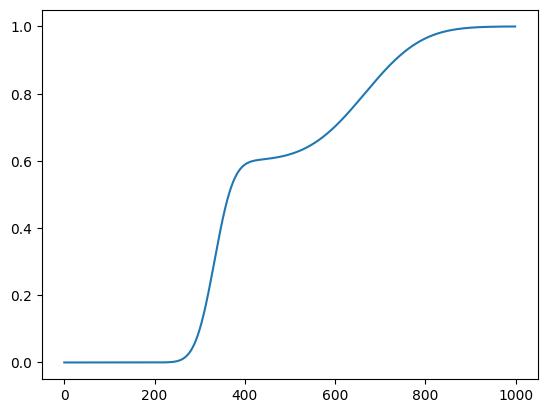

In [6]:
plt.plot(cdf_personalizada)

(array([  4.,   2.,  15.,  21.,  64.,  68., 108., 173., 231., 295., 350.,
        410., 466., 513., 582., 512., 501., 410., 352., 289., 215., 162.,
        102.,  70.,  40.,  33.,  15.,  16.,  12.,  12.,  10.,  14.,  17.,
         17.,  23.,  25.,  32.,  26.,  37.,  47.,  43.,  52.,  57.,  48.,
         60.,  61.,  89.,  68.,  95.,  88., 101., 106., 109., 105.,  97.,
        100.,  89., 142., 132., 133., 121., 126., 125., 103., 108., 103.,
         92.,  82., 106.,  76.,  92.,  65.,  74.,  74.,  66.,  49.,  60.,
         57.,  51.,  44.,  30.,  32.,  28.,  25.,  22.,  17.,  18.,  13.,
          8.,  12.,  16.,  10.,   9.,   2.,   4.,   4.,   2.,   3.,   2.,
          3.]),
 array([-3.24514945, -3.022034  , -2.79891855, -2.5758031 , -2.35268765,
        -2.1295722 , -1.90645675, -1.6833413 , -1.46022585, -1.2371104 ,
        -1.01399495, -0.7908795 , -0.56776405, -0.3446486 , -0.12153315,
         0.1015823 ,  0.32469775,  0.5478132 ,  0.77092865,  0.9940441 ,
         1.21715955,  1.44

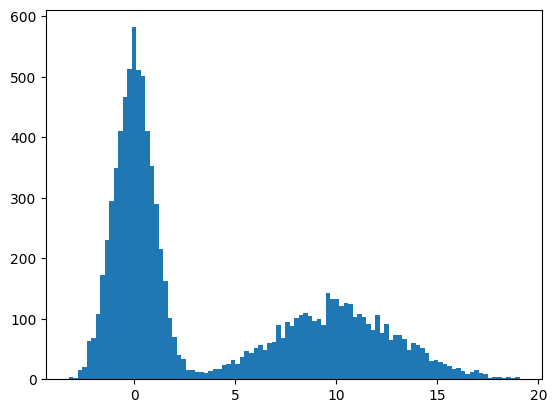

In [10]:
plt.hist(amostras_geradas, bins=100)